In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///D:/Promi/SurfsUp/Starter_Code/Resources/hawaii.sqlite")

In [8]:
# Reflect the database schema
Base = automap_base()
Base.prepare(autoload_with=engine)


In [9]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session

# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the dataset
recent_date = session.query(func.max(Measurement.date)).scalar()

# Print the most recent date
print(f"The most recent date in the dataset is: {recent_date}")


The most recent date in the dataset is: 2017-08-23


Date one year ago: 2016-08-23 00:00:00


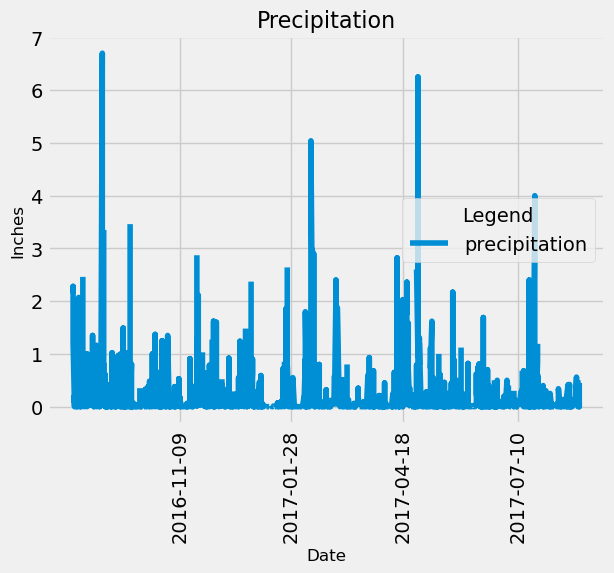

In [24]:
# Import required modules
from datetime import datetime, timedelta

# Step 1: Calculate the date one year from the most recent date
one_year_ago = datetime.strptime(recent_date, '%Y-%m-%d') - timedelta(days=365)
print(f"Date one year ago: {one_year_ago}")

# Step 2: Query precipitation data for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Step 3: Save the query results into a Pandas DataFrame
precip_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Step 4: Sort the DataFrame by date
precip_df = precip_df.sort_values(by='date')

# Step 5: Use Pandas Plotting with Matplotlib to plot the data

# Set the figure size
plt.figure() 

# Plot the data
plt.plot(precip_df['date'], precip_df['prcp'], label='precipitation')

# Add labels and title
plt.title("Precipitation", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Inches", fontsize=12)

# Add a legend
plt.legend(title="Legend")

# Define specific x-axis tick locations and labels
custom_ticks = ["2016-11-09", "2017-01-28", "2017-04-18", "2017-07-10"]
plt.xticks(custom_ticks, custom_ticks, rotation=90)

# Show the plot

plt.show()


In [27]:
# Calculate summary statistics for the precipitation data
precipitation_stats = precip_df['prcp'].describe()

# Display the summary statistics
print(precipitation_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [28]:
# Query to calculate the total number of stations
total_stations = session.query(func.count(Station.station)).scalar()

# Display the result
print(f"Total number of stations: {total_stations}")


Total number of stations: 9


In [29]:
# Query to find the most active stations
active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)

# Display the results
print("Most active stations and their observation counts:")
for station, count in active_stations:
    print(f"Station: {station}, Observations: {count}")


Most active stations and their observation counts:
Station: USC00519281, Observations: 2772
Station: USC00519397, Observations: 2724
Station: USC00513117, Observations: 2709
Station: USC00519523, Observations: 2669
Station: USC00516128, Observations: 2612
Station: USC00514830, Observations: 2202
Station: USC00511918, Observations: 1979
Station: USC00517948, Observations: 1372
Station: USC00518838, Observations: 511


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

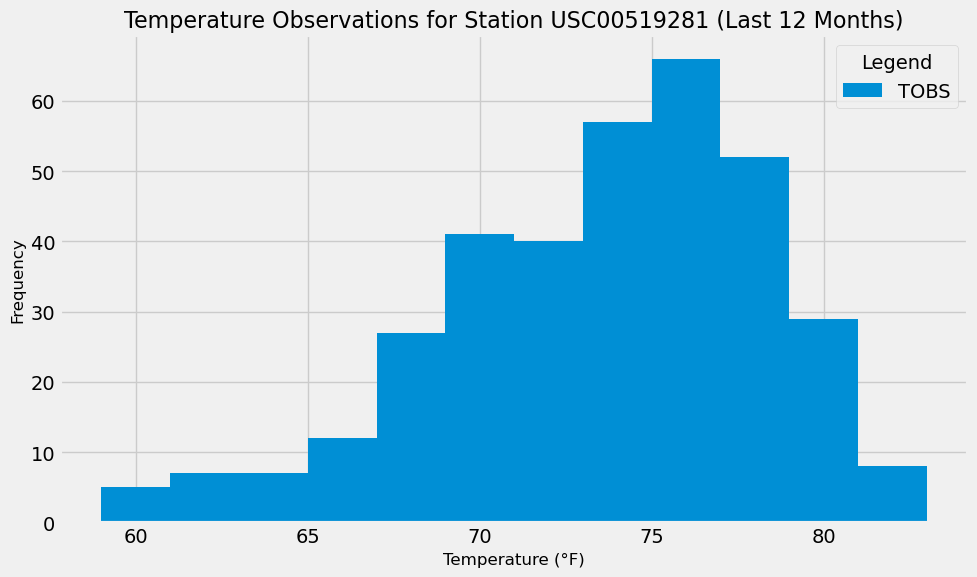

In [32]:
# Query the previous 12 months of temperature observation (TOBS) data for the most active station
tobs_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station)
    .filter(Measurement.date >= one_year_ago)
    .all()
)

# Convert the query results to a list of TOBS values
tobs_list = [temp[0] for temp in tobs_data]

# Plot the TOBS data as a histogram
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(tobs_list, bins=12, label='TOBS')

# Add labels, title, and legend
plt.title(f"Temperature Observations for Station {most_active_station} (Last 12 Months)", fontsize=16)
plt.xlabel("Temperature (°F)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Legend")

# Show the plot
plt.tight_layout()
plt.show()

# Close Session

In [33]:
# Close Session
session.close()